In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv("TV_Final.csv")

In [3]:
train

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3
...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,44999,57900,Linux,4.4
908,SONY,Full HD LED,40,41499,51900,Linux,4.6
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3
910,SONY,HD LED,32,32900,32900,Linux,4.4


In [4]:
train.describe(
)

,Size,Selling Price,Original Price,Rating
count,912.000000,912.000000,912.000000,692.000000
mean,45.942982,59358.606360,81975.213816,4.234104
std,12.316492,65866.677856,84823.568826,0.366694
min,17.000000,4849.000000,6999.000000,2.000000
25%,32.000000,19797.500000,28990.000000,4.100000
50%,43.000000,36990.000000,52900.000000,4.300000
75%,55.000000,67064.250000,99900.000000,4.400000
max,85.000000,499990.000000,549990.000000,5.000000


In [5]:
train["O-S Price"]  = train["Original Price"]- train["Selling Price"]

In [6]:
train.columns
cols=['Brand', 'Resolution',"Operating System", 'Rating','Size ', 'Selling Price', 'Original Price','O-S Price']
train=train[cols]

In [7]:
train

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
0,TOSHIBA,Ultra HD LED,VIDAA,4.3,55,37999,54990,16991
1,TCL,QLED Ultra HD,Android,4.4,55,52999,129990,76991
2,realme,HD LED,Android,4.3,32,13999,17999,4000
3,Mi,HD LED,Android,4.4,32,14999,19999,5000
4,realme,HD LED,Android,4.3,32,12999,21999,9000
...,...,...,...,...,...,...,...,...
907,SONY,Full HD LED,Linux,4.4,43,44999,57900,12901
908,SONY,Full HD LED,Linux,4.6,40,41499,51900,10401
909,SONY,Ultra HD LED,Linux,4.3,65,149990,184990,35000
910,SONY,HD LED,Linux,4.4,32,32900,32900,0


### Visualizing The Data

<AxesSubplot:>

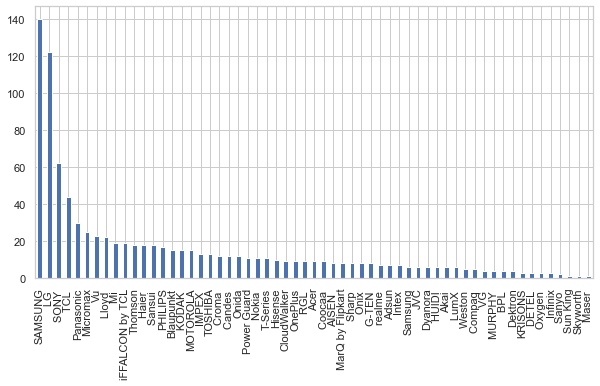

In [8]:
sns.set_style("whitegrid")
train["Brand"].value_counts().plot(kind="bar", figsize=(10,5))

as we can see Samsung, LG, Sony, TCL, Panasonic are top most sold televison

In [9]:
train["Brand"].value_counts().nlargest(40)

SAMSUNG             140
LG                  122
SONY                 62
TCL                  44
Panasonic            30
Micromax             25
Vu                   23
Lloyd                22
Mi                   19
iFFALCON by TCL      19
Thomson              18
Haier                18
Sansui               18
PHILIPS              17
Blaupunkt            15
KODAK                15
MOTOROLA             15
IMPEX                13
TOSHIBA              13
Croma                12
Candes               12
Onida                12
Power Guard          11
Nokia                11
T-Series             11
Hisense              10
CloudWalker           9
OnePlus               9
RGL                   9
Acer                  9
Coocaa                9
AISEN                 8
MarQ by Flipkart      8
Sharp                 8
Onix                  8
G-TEN                 8
realme                7
Adsun                 7
Intex                 7
Samsung               6
Name: Brand, dtype: int64

<AxesSubplot:ylabel='Resolution'>

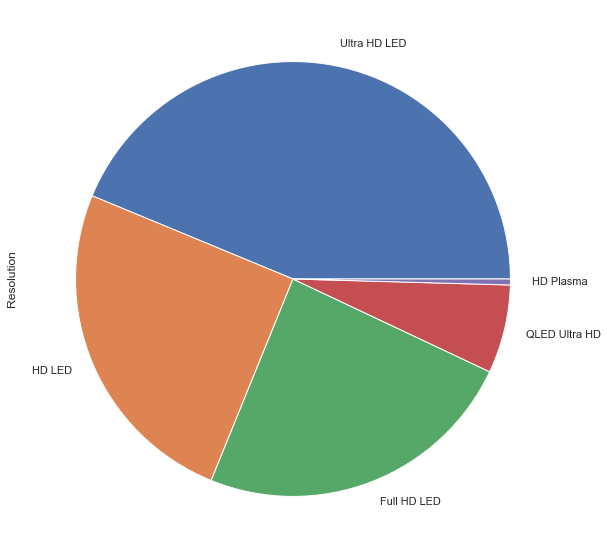

In [10]:
sns.set_style("whitegrid")
train["Resolution"].value_counts().plot(kind="pie", figsize=(20,10))

In [11]:
train["Resolution"].value_counts()

Ultra HD LED     399
HD LED           229
Full HD LED      220
QLED Ultra HD     60
HD Plasma          4
Name: Resolution, dtype: int64

<AxesSubplot:>

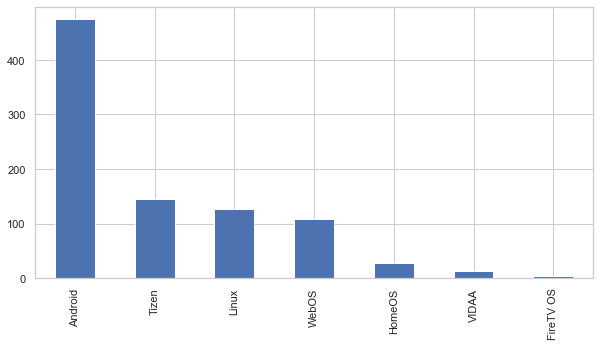

In [12]:
train["Operating System"].value_counts().nlargest(10).plot(kind="bar", figsize=(10,5))

In [13]:
train["Operating System"].value_counts()

Android      474
Tizen        145
Linux        127
WebOS        109
HomeOS        28
VIDAA         13
FireTV OS      5
Name: Operating System, dtype: int64

### Outliers

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


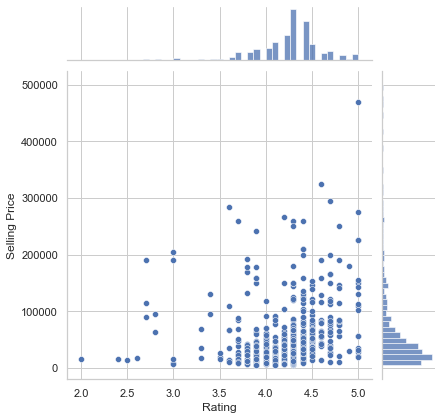

In [14]:
sns.jointplot(train.Rating, train["Selling Price"])

In [15]:
train = train.drop(train[(train["Rating"]<2.3) & (train["Selling Price"]>400000)].index).reset_index(drop=True)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

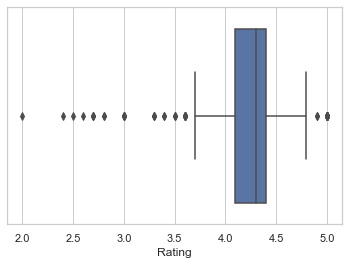

In [16]:
sns.boxplot(train["Rating"])

In [17]:
train["Rating"].value_counts()

4.3    156
4.4    121
4.2     77
4.1     55
4.5     48
4.0     38
3.9     35
4.7     27
3.8     25
3.7     23
4.6     20
5.0     18
4.8     16
3.6      9
3.0      5
3.3      3
3.5      3
2.7      3
4.9      2
3.4      2
2.8      2
2.4      1
2.0      1
2.5      1
2.6      1
Name: Rating, dtype: int64

i will be droping raiting below 2, they stand like outliers, since machine barely make decision on insufficient data, so we can assume that costumers rarely request for product with low rating, but i will suggest that most cases, it shouldnt be treated

In [18]:
train = train.drop(train[train["Rating"]<2.6].index).reset_index(drop=True)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

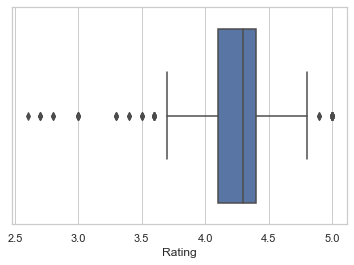

In [19]:
sns.boxplot(train["Rating"])

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling Price'>

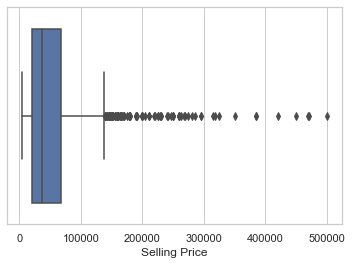

In [20]:
sns.boxplot(train["Selling Price"])

In [21]:
train = train.drop(train[train["Selling Price"]>400000].index).reset_index(drop=True)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling Price'>

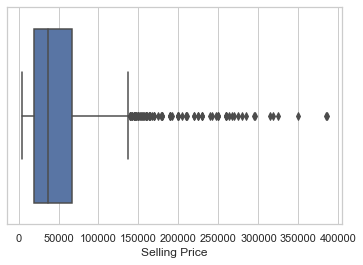

In [22]:
sns.boxplot(train["Selling Price"])

In [23]:
train = train.drop(train[train["Original Price"]>400000].index).reset_index(drop=True)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Original Price'>

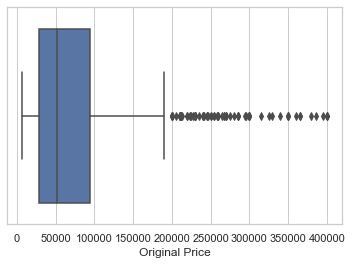

In [24]:
sns.boxplot(train["Original Price"])

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size '>

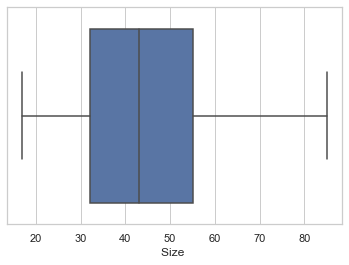

In [25]:
sns.boxplot(train["Size "])

### Missing Data

In [26]:
df = train.copy()

In [27]:
train.isna().sum().sort_values(ascending=False)

Rating              213
Operating System     11
Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
O-S Price             0
dtype: int64

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
mis_cols=df["Rating"].mean()
df["Rating"].fillna(mis_cols, inplace=True)

In [30]:
df[180:200]

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
180,LG,Ultra HD LED,WebOS,4.800000,55,76197,129990,53793
181,realme,Full HD LED,Android,4.200000,32,17999,23999,6000
182,Micromax,Full HD LED,Android,3.900000,43,22999,26990,3991
183,SAMSUNG,QLED Ultra HD,Tizen,4.400000,55,159500,244900,85400
184,Micromax,Full HD LED,Android,4.300000,43,23990,33000,9010
185,LG,Ultra HD LED,WebOS,4.500000,43,47499,75343,27844
186,LG,Ultra HD LED,WebOS,4.241314,43,46969,64990,18021
187,TCL,Full HD LED,Android,4.300000,75,144790,259990,115200
188,LG,HD LED,WebOS,4.300000,32,22200,25999,3799
189,Candes,HD LED,Android,4.100000,24,9999,17990,7991


In [31]:
df["Operating System"].value_counts()

Android      469
Tizen        142
Linux        124
WebOS        106
HomeOS        28
VIDAA         13
FireTV OS      5
Name: Operating System, dtype: int64

i have taking time to go through the 11 missing value on Operating system, the major of them is an android 

In [32]:
df["Operating System"].fillna("Android", inplace=True)

In [33]:
df.isna().sum()

Brand               0
Resolution          0
Operating System    0
Rating              0
Size                0
Selling Price       0
Original Price      0
O-S Price           0
dtype: int64

 we have completely clear the missing values

### Lebel the data, since ML Understand value

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
0,TOSHIBA,Ultra HD LED,VIDAA,4.3,55,37999,54990,16991
1,TCL,QLED Ultra HD,Android,4.4,55,52999,129990,76991
2,realme,HD LED,Android,4.3,32,13999,17999,4000
3,Mi,HD LED,Android,4.4,32,14999,19999,5000
4,realme,HD LED,Android,4.3,32,12999,21999,9000
...,...,...,...,...,...,...,...,...
893,SONY,Full HD LED,Linux,4.4,43,44999,57900,12901
894,SONY,Full HD LED,Linux,4.6,40,41499,51900,10401
895,SONY,Ultra HD LED,Linux,4.3,65,149990,184990,35000
896,SONY,HD LED,Linux,4.4,32,32900,32900,0


In [36]:
ibe= LabelEncoder()
cols= ("Operating System", "Resolution")
for i in cols:
    df[i] = ibe.fit_transform(list(df[i].values))

In [37]:
df

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
0,TOSHIBA,4,5,4.3,55,37999,54990,16991
1,TCL,3,0,4.4,55,52999,129990,76991
2,realme,1,0,4.3,32,13999,17999,4000
3,Mi,1,0,4.4,32,14999,19999,5000
4,realme,1,0,4.3,32,12999,21999,9000
...,...,...,...,...,...,...,...,...
893,SONY,0,3,4.4,43,44999,57900,12901
894,SONY,0,3,4.6,40,41499,51900,10401
895,SONY,4,3,4.3,65,149990,184990,35000
896,SONY,1,3,4.4,32,32900,32900,0


In [38]:
corrmat=df.corr()

In [39]:
corrmat["Selling Price"].sort_values(ascending=False)

Selling Price       1.000000
Original Price      0.931340
Size                0.674223
Operating System    0.433770
O-S Price           0.429307
Resolution          0.344897
Rating              0.122372
Name: Selling Price, dtype: float64

cols = df.columns
sns.pairplot(df[(cols)])

In [40]:
df["Selling Price"] = np.log1p(df["Selling Price"])

In [41]:
df["Original Price"] = np.log1p(df["Original Price"])

In [42]:
df

,Brand,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price
0,TOSHIBA,4,5,4.3,55,10.545341,10.914925,16991
1,TCL,3,0,4.4,55,10.878047,11.775220,76991
2,realme,1,0,4.3,32,9.546813,9.798127,4000
3,Mi,1,0,4.4,32,9.615805,9.903488,5000
4,realme,1,0,4.3,32,9.472705,9.998798,9000
...,...,...,...,...,...,...,...,...
893,SONY,0,3,4.4,43,10.714418,10.966490,12901
894,SONY,0,3,4.6,40,10.633449,10.857093,10401
895,SONY,4,3,4.3,65,11.918331,12.128062,35000
896,SONY,1,3,4.4,32,10.401258,10.401258,0


In [43]:
from scipy.stats import skew
numeric= df.dtypes[df.dtypes != "object"].index
skewed_var = df[numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame({"Skewed Feautures" : skewed_var})
skewness

,Skewed Feautures
O-S Price,2.701722
Operating System,0.605622
Original Price,0.195060
Selling Price,0.151473
Size,0.044730
Resolution,-0.086588
Rating,-1.269118


In [44]:
from scipy.special import boxcox1p
skewness= skewness[abs(skewness) > 0.75]
skew_var2 = skewness.index
for i in skew_var2 :
    df[i] = boxcox1p(df[i], 0.15)
    df[i] +=1

In [45]:
df.columns

Index(['Brand', 'Resolution', 'Operating System', 'Rating', 'Size ',
       'Selling Price', 'Original Price', 'O-S Price'],
      dtype='object')

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
x= df[['Resolution', 'Operating System', 'Rating', 'Size ']]
x1= sm.add_constant(x)
vif = pd.DataFrame()
vif["VIF"] =[variance_inflation_factor(x1.values, 1) for i in range (x1.shape[1])]
vif["features"]= x1.columns

In [47]:
vif

,VIF,features
0,1.385846,const
1,1.385846,Resolution
2,1.385846,Operating System
3,1.385846,Rating
4,1.385846,Size


this is vif since its below 5

In [48]:
df = pd.get_dummies(df)

In [49]:
df

,Resolution,Operating System,Rating,Size,Selling Price,Original Price,O-S Price,Brand_AISEN,Brand_Acer,Brand_Adsun,...,Brand_Sun King,Brand_T-Series,Brand_TCL,Brand_TOSHIBA,Brand_Thomson,Brand_VG,Brand_Vu,Brand_Weston,Brand_iFFALCON by TCL,Brand_realme
0,2.820334,3.055642,2.894838,6.527074,3.955431,4.001017,23.070597,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2.540963,1.000000,2.918877,6.527074,3.996523,4.102646,30.380869,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.730463,1.000000,2.894838,5.597157,3.825753,3.859343,17.466443,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.730463,1.000000,2.918877,5.597157,3.835041,3.873227,18.253669,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.730463,1.000000,2.894838,5.597157,3.815718,3.885690,20.458096,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,1.000000,2.540963,2.918877,6.093857,3.976437,4.007282,21.907811,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,1.000000,2.540963,2.965840,5.969939,3.966410,3.993964,21.031182,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,2.820334,2.540963,2.894838,6.831328,4.118984,4.142652,26.360669,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,1.730463,2.540963,2.918877,5.597157,3.937322,3.937322,1.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
target=df["Selling Price"]

In [51]:
inputs= df.drop(["Selling Price", "Original Price"], axis=1)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler= StandardScaler()
scaller = scaler.fit_transform(inputs)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(scaller, target, random_state=42, test_size=0.2)

In [56]:
scaller.shape

(898, 64)

In [57]:
target.shape

(898,)

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [59]:
y_hat = lin_reg.predict(x_train)

In [60]:
lin_reg.intercept_

3.9506296385295303

In [61]:
inputs.columns

Index(['Resolution', 'Operating System', 'Rating', 'Size ', 'O-S Price',
       'Brand_AISEN  ', 'Brand_Acer', 'Brand_Adsun', 'Brand_Akai ',
       'Brand_BPL ', 'Brand_Blaupunkt', 'Brand_Candes ', 'Brand_CloudWalker',
       'Brand_Compaq ', 'Brand_Coocaa ', 'Brand_Croma ', 'Brand_DETEL ',
       'Brand_Dektron', 'Brand_Dyanora', 'Brand_G-TEN ', 'Brand_HUIDI ',
       'Brand_Haier ', 'Brand_Hisense', 'Brand_IMPEX ', 'Brand_Infinix',
       'Brand_Intex ', 'Brand_JVC', 'Brand_KODAK ', 'Brand_KRISONS',
       'Brand_LG ', 'Brand_Lloyd ', 'Brand_LumX ', 'Brand_MOTOROLA',
       'Brand_MURPHY ', 'Brand_MarQ by Flipkart', 'Brand_Maser ', 'Brand_Mi ',
       'Brand_Micromax', 'Brand_Nokia ', 'Brand_OnePlus', 'Brand_Onida',
       'Brand_Onix ', 'Brand_Oxygen ', 'Brand_PHILIPS', 'Brand_Panasonic',
       'Brand_Power Guard', 'Brand_RGL ', 'Brand_SAMSUNG', 'Brand_SONY ',
       'Brand_Samsung', 'Brand_Sansui ', 'Brand_Sanyo ', 'Brand_Sharp ',
       'Brand_Skyworth', 'Brand_Sun King', 'Brand_

In [62]:
lin_reg.coef_

array([ 7.72968229e-03, -8.75862901e-03,  1.83417691e-03,  8.87444244e-02,
       -2.40179895e-02, -1.09515528e+11, -1.16093483e+11, -1.02499932e+11,
       -9.49497352e+10, -7.76129982e+10, -1.49369417e+11, -1.33826830e+11,
       -1.16093483e+11, -8.67254251e+10, -1.16093483e+11, -1.33826830e+11,
       -6.72524098e+10, -7.76129982e+10, -8.67254251e+10, -1.09515528e+11,
       -9.49497352e+10, -1.63347802e+11, -1.16093483e+11, -1.39212751e+11,
       -6.72524098e+10, -1.02499932e+11, -9.49497352e+10, -1.49369417e+11,
       -6.72524098e+10, -3.93753122e+11, -1.76134792e+11, -9.49497352e+10,
       -1.49369417e+11, -7.76129982e+10, -1.09515528e+11, -3.88715562e+10,
       -1.67728531e+11, -1.91740048e+11, -1.28201722e+11, -1.16093483e+11,
       -1.33826830e+11, -1.09515528e+11, -6.72524098e+10, -1.58835700e+11,
       -2.09438344e+11, -1.28201722e+11, -1.16093483e+11, -4.19071684e+11,
       -2.88763762e+11, -9.49497352e+10, -1.63347802e+11, -5.49420308e+10,
       -1.02499932e+11, -

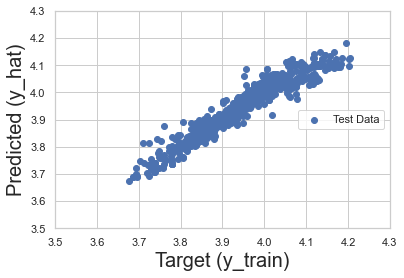

In [63]:
plt.scatter(y_train, y_hat, label="Test Data")

plt.xlabel("Target (y_train)", size=20)


plt.ylabel("Predicted (y_hat)", size=20)
plt.ylim(3.5,4.3)
plt.xlim(3.5,4.3)
plt.legend(loc=5)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

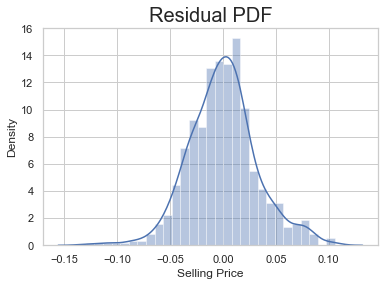

In [64]:
sns.distplot(y_train - y_hat)
plt.title("Residual PDF", size=20)

In [65]:
lin_reg.score(x_train,y_train)

0.9121866514371362

In [66]:
### Manually Check Accuracy

In [67]:
model_output =lin_reg.predict(x_train).round()
model_output

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [68]:
y_train.round(2)

880    3.98
740    3.92
231    3.86
388    3.82
118    3.95
       ... 
106    3.96
270    3.93
860    3.85
435    3.83
102    4.01
Name: Selling Price, Length: 718, dtype: float64

In [69]:
model_output == y_train.round()

880    True
740    True
231    True
388    True
118    True
       ... 
106    True
270    True
860    True
435    True
102    True
Name: Selling Price, Length: 718, dtype: bool

In [70]:
np.sum(model_output == y_train.round())

718

In [71]:
model_output.shape

(718,)

In [72]:
np.sum(model_output == y_train.round()) / model_output.shape[0]

1.0

In [73]:
x_train.shape, y_train.shape

((718, 64), (718,))

from sklearn.metrics import mean_squared_error
y_predict= lin_reg.predict(x_train)
error = mean_squared_error(x_train, y_predict.T)
s_error= np.sqrt(error)
s_error

the R- square is good but not better, let's see if we can improve it

In [74]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [75]:
tree_reg.score(x_train, y_train)

0.9997205125859577

In [76]:
y_hat2 = tree_reg.predict(x_train)

C:\Users\DVICEPP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

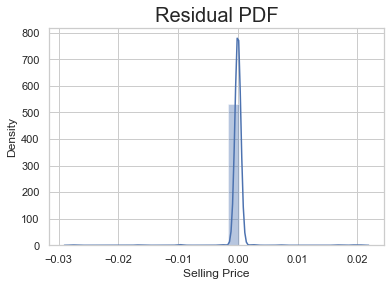

In [77]:
sns.distplot(y_train - y_hat2)
plt.title("Residual PDF", size=20)

In [78]:
y_hat= lin_reg.predict(x_train)

(3.5, 4.3)

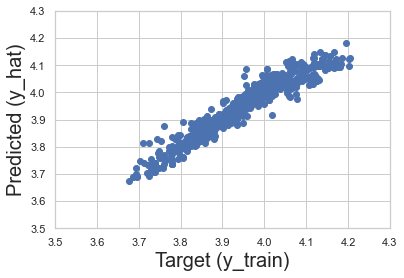

In [79]:
plt.scatter(y_train, y_hat)

plt.xlabel("Target (y_train)", size=20)

plt.ylabel("Predicted (y_hat)", size=20)
plt.ylim(3.5,4.3)
plt.xlim(3.5,4.3)

(3.5, 4.3)

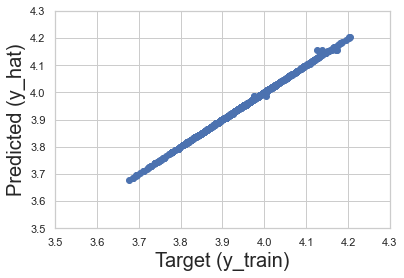

In [80]:
plt.scatter(y_train, y_hat2)

plt.xlabel("Target (y_train)", size=20)

plt.ylabel("Predicted (y_hat)", size=20)
plt.ylim(3.5,4.3)
plt.xlim(3.5,4.3)

In [81]:
from sklearn.model_selection import cross_val_score

In [83]:
score1 = cross_val_score(tree_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [84]:
tree_cvs =np.sqrt(-score1)

In [85]:
tree_cvs

array([0.03999372, 0.03802293, 0.042119  , 0.04540466, 0.05451645,
       0.04453896, 0.04186918, 0.0502407 , 0.03911189, 0.03722489])

In [86]:
np.mean(tree_cvs), np.std(tree_cvs)

(0.04330423905530909, 0.005259416369269672)

In [87]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_cvs)


Scores: [0.03999372 0.03802293 0.042119   0.04540466 0.05451645 0.04453896
 0.04186918 0.0502407  0.03911189 0.03722489]
Mean: 0.04330423905530909
Standard deviation: 0.005259416369269672


In [88]:
b= [0.04413217, 0.04228039, 0.04089118, 0.04611245, 0.05118645, 0.05283442,
 0.04816304, 0.05172952, 0.04218179, 0.04362818]

In [89]:
score2 = cross_val_score(lin_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
lin_cvs =np.sqrt(-score2)
lin_cvs
d=[0.03765696, 0.01356296, 0.01361114, 0.01366524, 0.01383534,
       0.01337146, 0.01348806, 0.01337857, 0.0133967 , 0.01393744]

In [90]:
np.mean(lin_cvs), np.std(lin_cvs)

(15912640688.042978, 26936827941.29346)

### Validation curve

In [91]:
from sklearn.model_selection import validation_curve

In [92]:
np.mean(x_train)

0.002801003035509634

x_train, y_train = validation_curve(tree_reg, x_train,y_train, param_name="max_depth", param_range=range(1,len(x_train)), cv=10)
plt.plot(tree_reg, np.mean(x_train, 1), color="blue")
plt.plot(tree_reg, np.mean(tree_cvs, 1), color="red")

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
forest_reg= RandomForestRegressor()
forest_reg.fit(x_train,y_train)

RandomForestRegressor()

In [95]:
score3 = cross_val_score(forest_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
forest_cvs =np.sqrt(-score3)
forest_cvs
c=[0.03460192, 0.03093604, 0.02822074, 0.03304305, 0.03708905,
       0.03341002, 0.03300783, 0.03236916, 0.03333704, 0.03080104]

In [96]:
np.mean(forest_cvs)

0.03206170567662565

In [97]:
np.std(forest_cvs)

0.0016215107021353922

In [98]:
from sklearn.linear_model import SGDRegressor

In [99]:
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)

SGDRegressor()

In [100]:
sgd_reg.score(x_train,y_train)

0.9118115581431836

In [101]:
lin_reg.score(x_train,y_train)

0.9121866514371362

In [102]:
score4 = cross_val_score(sgd_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error")
sgd_cvs =np.sqrt(-score4)
sgd_cvs

array([0.03333965, 0.46015239, 0.46847366, 0.03843392, 0.03743093,
       0.03941739, 0.46734955, 0.04110293, 0.4790706 , 0.03076703])

In [103]:
a= [0.03986527, 0.03617853, 0.03768528, 0.04504103, 0.04998168,
       0.04718049, 0.04252464, 0.04116121, 0.04002029, 0.04091109]
np.mean(a)

0.04205495099999999

In [104]:
summ = pd.DataFrame([["Linear", np.mean(d), np.std(d)], 
                     ["SGD_Reg", np.mean(a), np.std(a)], 
                     ["Forest_Reg", np.mean(c), np.std(c)], 
                     ["Tree_Reg", np.mean(b), np.std(b)]], 
                    columns=[["Model", "Mean","Standard Deviation"], ])

In [105]:
summ

,Model,Mean,Standard Deviation
0,Linear,0.015990,0.007224
1,SGD_Reg,0.042055,0.004036
2,Forest_Reg,0.032682,0.002256
3,Tree_Reg,0.046314,0.004169


As we can see, Linear Regression is the best model to use for This regression, as others may cost overfitting on our model, since it has the lowest cross_val_score mean...meaning the mean_squared_error will also be low, for we can begin  to fine tune our algorithm

In [106]:
yhat3 = forest_reg.predict(x_train)

In [107]:
yhat4= sgd_reg.predict(x_train)

Text(0.5, 1.0, 'TreeRegressor')

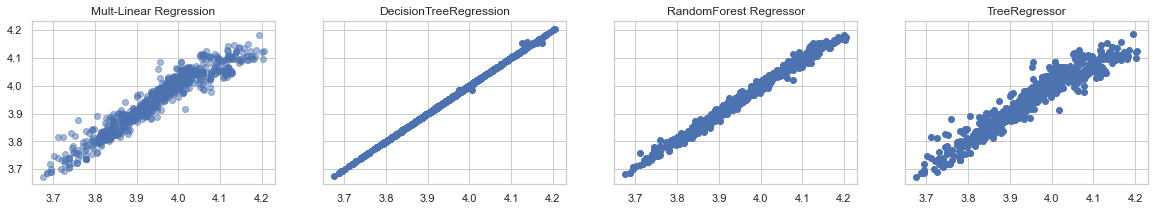

In [108]:
f, (x1, x2, x3, x4) = plt.subplots(1, 4, sharey= True, figsize=(20,3))
x1.scatter(y_train, y_hat, alpha= 0.5)
x1.set_title("Mult-Linear Regression")

x2.scatter(y_train, y_hat2)
x2.set_title("DecisionTreeRegression")

x3.scatter(y_train, yhat3)
x3.set_title("RandomForest Regressor")

x4.scatter(y_train, yhat4)
x4.set_title("TreeRegressor")

In [109]:
lin_regsum= pd.DataFrame(inputs.columns.values, columns=["Features"])
lin_regsum["Weights"] = lin_reg.coef_
lin_regsum.sort_values(by=["Weights"], ascending=False).head(50)

,Features,Weights
3,Size,8.874442e-02
0,Resolution,7.729682e-03
2,Rating,1.834177e-03
1,Operating System,-8.758629e-03
4,O-S Price,-2.401799e-02
54,Brand_Sun King,-3.887156e+10
53,Brand_Skyworth,-3.887156e+10
35,Brand_Maser,-3.887156e+10
51,Brand_Sanyo,-5.494203e+10
28,Brand_KRISONS,-6.725241e+10


In [110]:
train["Brand"].unique()

array(['TOSHIBA', 'TCL ', 'realme ', 'Mi ', 'OnePlus', 'Hisense', 'LG ',
       'MarQ by Flipkart', 'iFFALCON by TCL', 'Coocaa ', 'SAMSUNG',
       'Infinix', 'Vu', 'Nokia ', 'Thomson', 'SONY ', 'KODAK ',
       'MOTOROLA', 'PHILIPS', 'Acer', 'Blaupunkt', 'Adsun', 'T-Series',
       'Panasonic', 'Micromax', 'Sansui ', 'Croma ', 'Candes ', 'Dyanora',
       'Haier ', 'Onida', 'RGL ', 'Lloyd ', 'LumX ', 'Onix ', 'IMPEX ',
       'BPL ', 'CloudWalker', 'Oxygen ', 'Power Guard', 'Akai ', 'VG ',
       'Sun King', 'Compaq ', 'HUIDI ', 'Intex ', 'DETEL ', 'JVC',
       'G-TEN ', 'Skyworth', 'Maser ', 'Sanyo ', 'MURPHY ', 'Samsung',
       'Dektron', 'Sharp ', 'KRISONS', 'Weston ', 'AISEN  '], dtype=object)

## Testing our Model

In [111]:
y_hat_test = lin_reg.predict(x_test)

(3.5, 4.3)

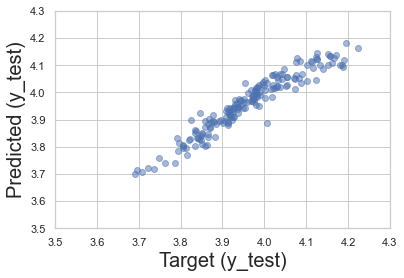

In [112]:
plt.scatter(y_test, y_hat_test, alpha=0.5)

plt.xlabel("Target (y_test)", size=20)

plt.ylabel("Predicted (y_test)", size=20)
plt.ylim(3.5,4.3)
plt.xlim(3.5,4.3)

In [113]:
df_pf = pd.DataFrame(np.exp(y_hat_test)*1000, columns=["Prediction"])
df_pf.head()

,Prediction
0,54167.034813
1,48825.450758
2,55814.895117
3,45255.489353
4,51727.573022


In [114]:
y_test = y_test.reset_index(drop=True)
df_pf["Target"] = np.exp(y_test)*1000

In [115]:
df_pf

,Prediction,Target
0,54167.034813,54021.136261
1,48825.450758,49514.299173
2,55814.895117,56267.860307
3,45255.489353,44543.456729
4,51727.573022,51300.578648
...,...,...
175,51557.364843,51865.734910
176,44050.928717,44383.780166
177,57309.648429,56911.938642
178,50050.474302,50240.327941


In [116]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Prediction"]

In [117]:
df_pf["Different%"] =np.abs( df_pf["Residual"]/df_pf["Target"]*100)

In [118]:
df_pf

,Prediction,Target,Residual,Different%
0,54167.034813,54021.136261,-145.898551,0.270077
1,48825.450758,49514.299173,688.848415,1.391211
2,55814.895117,56267.860307,452.965190,0.805016
3,45255.489353,44543.456729,-712.032625,1.598512
4,51727.573022,51300.578648,-426.994373,0.832338
...,...,...,...,...
175,51557.364843,51865.734910,308.370067,0.594555
176,44050.928717,44383.780166,332.851449,0.749939
177,57309.648429,56911.938642,-397.709787,0.698816
178,50050.474302,50240.327941,189.853639,0.377891


In [119]:
df_pf.describe()

,Prediction,Target,Residual,Different%
count,180.000000,180.000000,180.000000,180.000000
mean,52817.153483,52888.286956,71.133474,2.353030
std,5591.434161,5965.820555,1747.966066,2.041884
min,40366.697544,40083.190500,-4497.048783,0.003188
25%,49008.323666,48358.999061,-924.848940,0.752963
50%,52925.176510,52250.089590,-91.837987,1.830113
75%,56754.560427,56315.315548,903.936033,3.312980
max,65417.722811,68241.584470,6095.895008,11.105342


In [120]:
pd.options.display.max_rows= 999
df_pf.round(4).sort_values(by=["Different%"])

,Prediction,Target,Residual,Different%
87,40740.4491,40741.7481,1.2989,0.0032
88,49256.4721,49251.4438,-5.0283,0.0102
169,47916.1631,47934.4286,18.2655,0.0381
25,61166.1239,61139.1608,-26.9631,0.0441
7,53350.0415,53325.3890,-24.6525,0.0462
38,49897.9652,49856.7650,-41.2002,0.0826
45,52980.1200,53027.6991,47.5791,0.0897
94,52928.4068,52873.2107,-55.1961,0.1044
143,41394.6486,41351.0268,-43.6218,0.1055
20,50736.3604,50682.5015,-53.8590,0.1063
